In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('final_bookings_cleaned.csv')

In [2]:
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_type,mmm yy,week no,day_type
0,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,Standard,May 22,W 19,weekend
1,May012216558RT28,16558,2022-05-01,2022-05-01,2022-05-02,2,RT2,others,NaN,Checked Out,12600,12600,Atliq Grands,Luxury,Delhi,Elite,May 22,W 19,weekend
2,May012216559RT115,16559,2022-05-01,2022-05-01,2022-05-03,2,RT1,tripster,NaN,Checked Out,11050,11050,Atliq Exotica,Luxury,Mumbai,Standard,May 22,W 19,weekend
3,May012216559RT25,16559,2022-05-01,2022-05-01,2022-05-04,2,RT2,others,5.0,Checked Out,15300,15300,Atliq Exotica,Luxury,Mumbai,Elite,May 22,W 19,weekend
4,May012216559RT27,16559,2022-05-01,2022-05-01,2022-05-02,4,RT2,others,NaN,Cancelled,18360,7344,Atliq Exotica,Luxury,Mumbai,Elite,May 22,W 19,weekend


Checking leakage by room type and hotel category 

In [13]:
leakage_by_room=df.groupby('room_category').agg({'revenue_generated' : 'sum', 'revenue_realized' : 'sum'}).reset_index()
leakage_by_room['revenue_leakage'] = leakage_by_room['revenue_generated'] - leakage_by_room['revenue_realized']
leakage_by_room['percent_leakage'] = (leakage_by_room['revenue_leakage'] / leakage_by_room['revenue_generated']) * 100
leakage_by_room

,room_category,revenue_generated,revenue_realized,revenue_leakage,percent_leakage
0,RT1,348313485,296650614,51662871,14.832291
1,RT2,631263690,536852790,94410900,14.955858
2,RT3,519970320,442533312,77437008,14.892582
3,RT4,423106820,361121144,61985676,14.650125


Text(0.5, 1.0, 'Percentage leakage by hotel category')

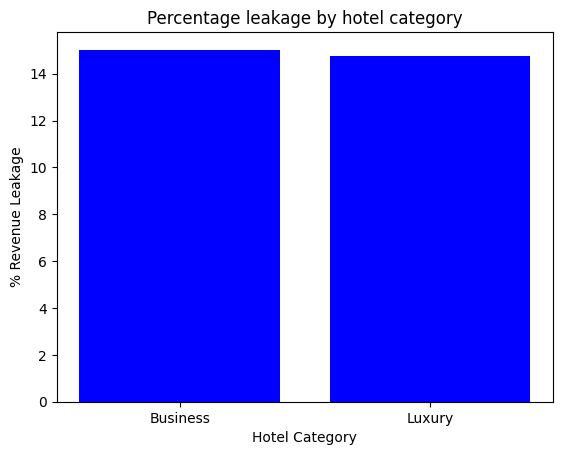

In [17]:
leakage_by_hotel_cat=df.groupby('category').agg({'revenue_generated' : 'sum', 'revenue_realized' : 'sum'}).reset_index()
leakage_by_hotel_cat['revenue_leakage'] = leakage_by_hotel_cat['revenue_generated'] - leakage_by_hotel_cat['revenue_realized']
leakage_by_hotel_cat['percent_leakage']= (leakage_by_hotel_cat['revenue_leakage'] / leakage_by_hotel_cat['revenue_generated']) * 100
leakage_by_hotel_cat.sort_values('percent_leakage', ascending=False,inplace=True )
leakage_by_hotel_cat.head()
plt.bar(leakage_by_hotel_cat['category'], leakage_by_hotel_cat['percent_leakage'], color='blue')
plt.ylabel('% Revenue Leakage')
plt.xlabel('Hotel Category')
plt.title('Percentage leakage by hotel category')

In [9]:
leakage_by_room.sort_values('percent_leakage', ascending=False, inplace=True)
leakage_by_room.head()

,room_category,revenue_generated,revenue_realized,revenue_leakage,percent_leakage
1,RT2,631263690,536852790,94410900,14.955858
2,RT3,519970320,442533312,77437008,14.892582
0,RT1,348313485,296650614,51662871,14.832291
3,RT4,423106820,361121144,61985676,14.650125


C:\Users\user\AppData\Local\Temp\ipykernel_4584\1108841660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percent_leakage', y='room_category', data=leakage_by_room, palette='coolwarm')


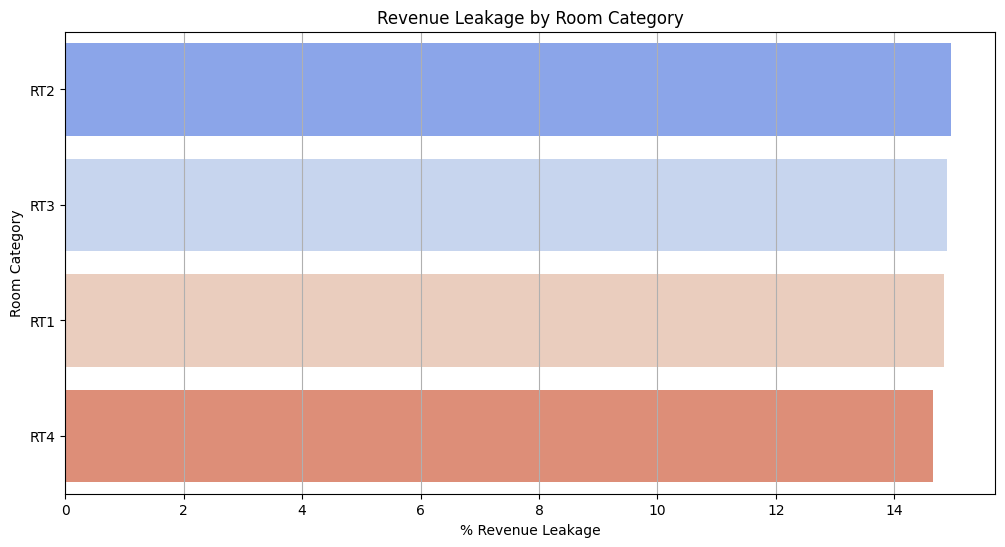

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='percent_leakage', y='room_category', data=leakage_by_room, palette='coolwarm')
plt.xlabel('% Revenue Leakage')
plt.ylabel('Room Category')
plt.title('Revenue Leakage by Room Category')
plt.grid(axis='x')
plt.show()


Insights from Hotel Category Leakage:
Business vs. Luxury Hotels – Revenue Leakage
Business hotels have the highest revenue leakage, slightly more than Luxury hotels.

Both categories show leakage around 14.5%–15%, which is significant — meaning nearly ₹15 out of every ₹100 expected isn’t realized.

The narrow gap between the two categories suggests leakage is a systemic issue, not just limited to one market segment.

Insights from Room Category Leakage
RT1, RT2, RT3, RT4 – Revenue Leakage
All room types show similar leakage (~14.5–15%), but:

RT4 (Room Type 4) has the highest leakage.

RT2 has the lowest, though still high (~14.5%).

The consistency in leakage across room types indicates the issue may not be pricing alone — but possibly operational (e.g., cancellations, late check-ins, underuse).

Checking Time based trends

In [19]:
# Create a unified time period column like "May 22 - W19"
df['time_period'] = df['mmm yy'].astype(str) + ' - ' + df['week no'].astype(str)

revenue_trend = df.groupby('time_period').agg({
    'revenue_generated': 'sum',
    'revenue_realized': 'sum'
}).reset_index()

# Calculate revenue leakage
revenue_trend['revenue_loss'] = revenue_trend['revenue_generated'] - revenue_trend['revenue_realized']
revenue_trend.head()

,time_period,revenue_generated,revenue_realized,revenue_loss
0,Jul 22 - W 27,48486480,41590143,6896337
1,Jul 22 - W 28,160195905,136300386,23895519
2,Jul 22 - W 29,146341270,124964422,21376848
3,Jul 22 - W 30,127489025,108266696,19222329
4,Jul 22 - W 31,98176600,84200266,13976334


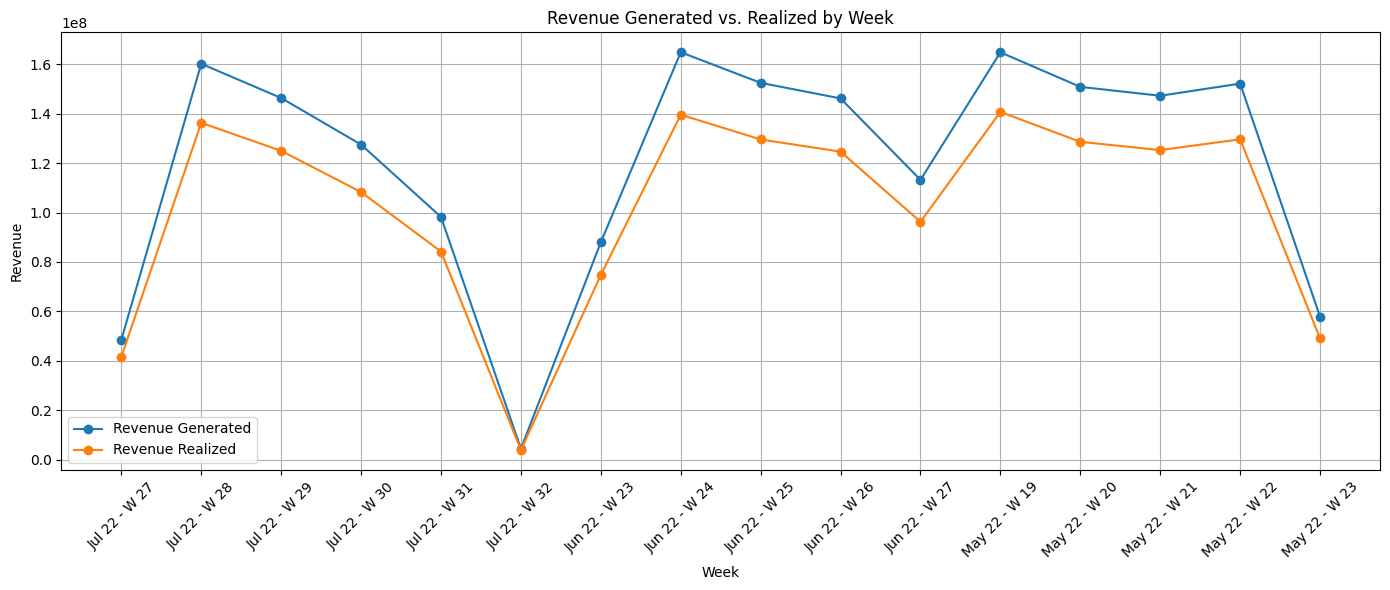

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(revenue_trend['time_period'], revenue_trend['revenue_generated'], label='Revenue Generated', marker='o')
plt.plot(revenue_trend['time_period'], revenue_trend['revenue_realized'], label='Revenue Realized', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue Generated vs. Realized by Week')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


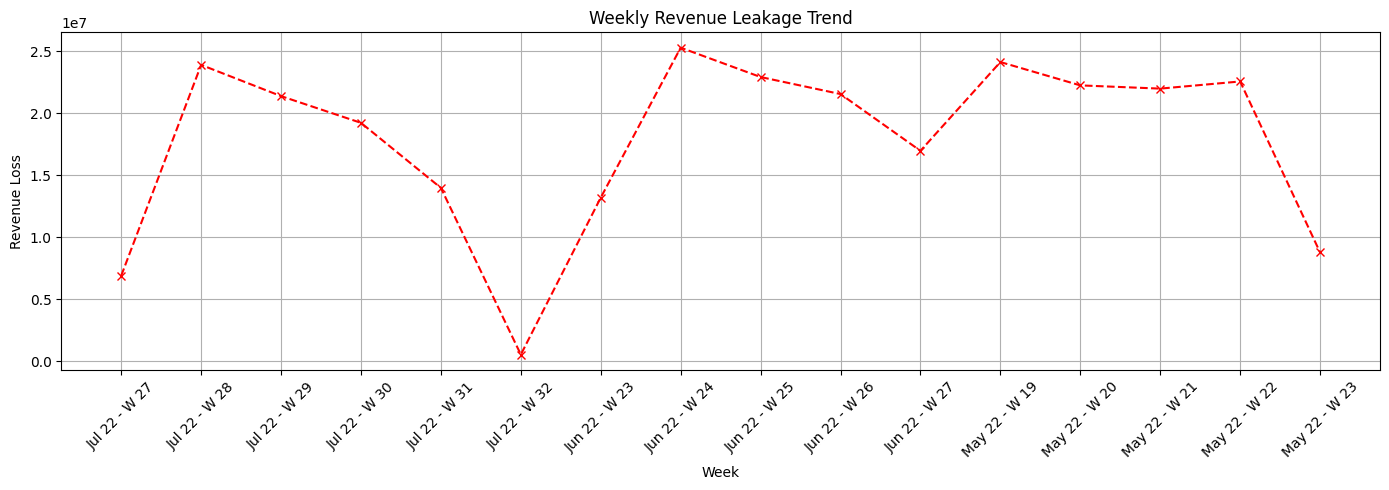

In [21]:
plt.figure(figsize=(14, 5))
plt.plot(revenue_trend['time_period'], revenue_trend['revenue_loss'], color='red', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Revenue Loss')
plt.title('Weekly Revenue Leakage Trend')
plt.grid(True)
plt.tight_layout()
plt.show()


Weekly Revenue Insights:
High leakage in Jul-22 W24 & W29: Strong bookings but poor realization — likely due to cancellations or discounts.

Lowest revenue & leakage in Jul-22 W21: Possible off-season or low demand.

Consistent leakage in May-22: Indicates underutilized demand or operational inefficiencies during peak weeks.

Overall trend: Leakage remains consistently high, even during high-revenue weeks.

CANCELLATION ANALYSIS

In [22]:
df['booking_status'].value_counts()


booking_status
Checked Out    90476
Cancelled      31934
No Show         6464
Name: count, dtype: int64

In [23]:
total_bookings = len(df)
cancelled = df[df['booking_status'] == 'Cancelled']
cancellation_rate = (len(cancelled) / total_bookings) * 100
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")


Overall Cancellation Rate: 24.78%


cancellation rate by booking platform:

In [32]:
group_col = 'booking_platform'  

cancel_rate_by_group = df.groupby(group_col)['booking_status'].value_counts(normalize=True).unstack()
cancel_rate_by_group['Cancellation %'] = cancel_rate_by_group['Cancelled'] * 100
cancel_rate_by_group = cancel_rate_by_group.sort_values('Cancellation %', ascending=False)

print(cancel_rate_by_group[['Cancellation %']])
cancel_rate_by_group

booking_status    Cancellation %
booking_platform                
makeyourtrip           24.928133
direct online          24.904692
others                 24.870584
tripster               24.850462
journey                24.654169
direct offline         24.369488
logtrip                24.263199


booking_status,Cancelled,Checked Out,No Show,Cancellation %
booking_platform,,,,
makeyourtrip,0.249281,0.700645,0.050074,24.928133
direct online,0.249047,0.703338,0.047615,24.904692
others,0.248706,0.700931,0.050363,24.870584
tripster,0.248505,0.699402,0.052094,24.850462
journey,0.246542,0.706917,0.046542,24.654169
direct offline,0.243695,0.702615,0.053690,24.369488
logtrip,0.242632,0.706410,0.050958,24.263199


In [ ]:
df['booking_status'].unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

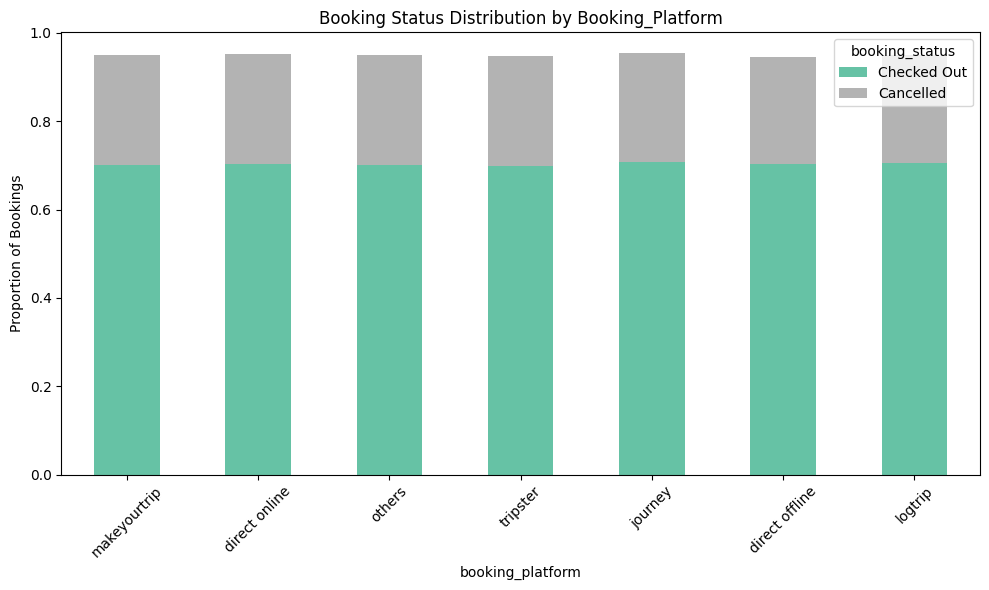

In [33]:
cancel_rate_by_group [['Checked Out', 'Cancelled']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Booking Status Distribution by ' + group_col.title())
plt.ylabel('Proportion of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

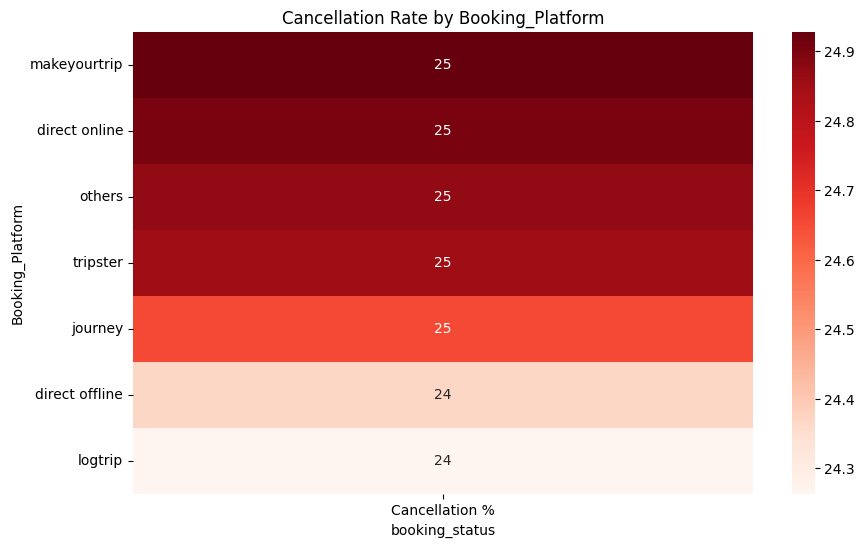

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(cancel_rate_by_group[['Cancellation %']], annot=True, cmap='Reds')
plt.title('Cancellation Rate by ' + group_col.title())
plt.ylabel(group_col.title())
plt.show()


Revenue loss per guest & city

In [41]:
# First, calculate revenue loss per booking
df['revenue_loss'] = df['revenue_generated'] - df['revenue_realized']

df['revenue_loss_per_guest'] = df['revenue_loss'] / df['no_guests'].replace(0, np.nan)
print('Revenue Lost per guest:', df['revenue_loss_per_guest'] )
# Revenue loss by city (sum)
city_loss = df.groupby('city')['revenue_loss'].sum().reset_index()
city_loss.columns = ['city', 'total_revenue_loss']


Revenue Lost per guest: 0             0.0
1             0.0
2             0.0
3             0.0
4          2754.0
           ...   
128869        0.0
128870        0.0
128871    19380.0
128872        0.0
128873     9690.0
Name: revenue_loss_per_guest, Length: 128874, dtype: float64


In [44]:
revenue_loss_by_city = df.groupby('city')['revenue_loss'].sum().reset_index()
revenue_loss_by_city = revenue_loss_by_city.sort_values(by='revenue_loss', ascending=False)
revenue_loss_by_city

,city,revenue_loss
3,Mumbai,111074889
0,Bangalore,71202600
2,Hyderabad,53580510
1,Delhi,49638456


C:\Users\user\AppData\Local\Temp\ipykernel_4584\3422770882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_loss_by_city, x='city', y='revenue_loss', palette='Reds_r')


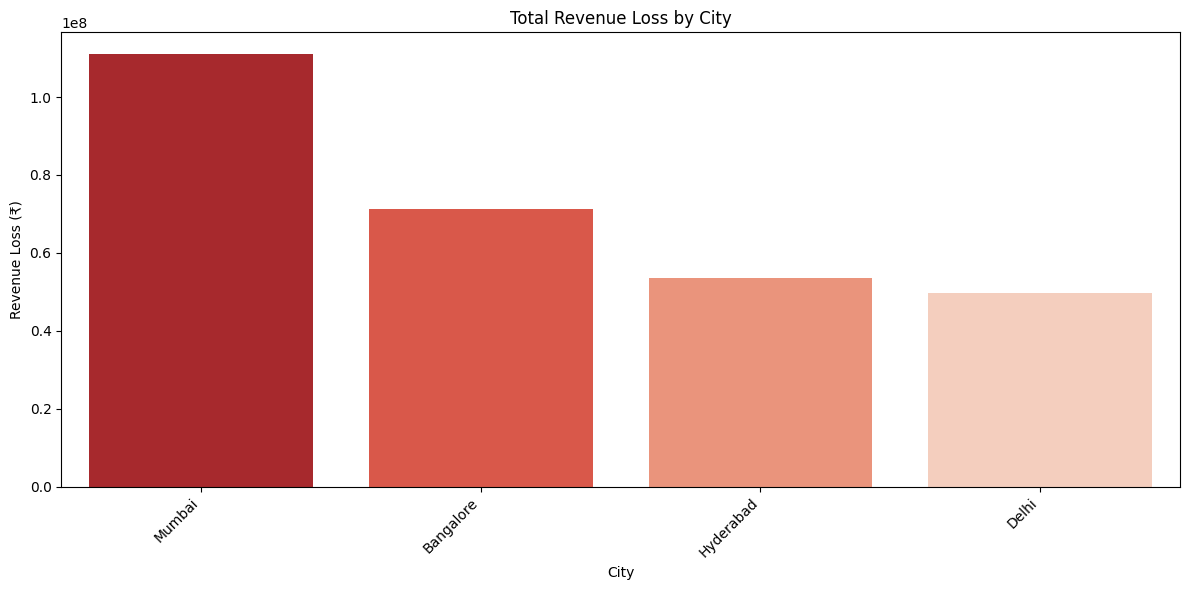

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_loss_by_city, x='city', y='revenue_loss', palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.title('Total Revenue Loss by City')
plt.xlabel('City')
plt.ylabel('Revenue Loss (₹)')
plt.tight_layout()
plt.show()


Platform-wise Cancellation Insights
Cancellation rates are fairly consistent across platforms (~24.2%–24.9%).

makemytrip and direct online have slightly higher cancellation rates (~24.9%) compared to logtrip (~24.26%).

This consistency suggests that cancellation behavior may be driven more by customer habits or hotel policies than platform-specific issues.

📌 No platform stands out as a major outlier, but you may want to review return/refund policies on makemytrip and direct online.

CITY DISTRIBUTION: 
Mumbai alone accounts for the largest share of total loss, nearly 2× that of Delhi.

These cities likely have higher booking volume or higher ticket sizes, but also potentially higher leakages due to cancellations or pricing inefficiencies.

Mumbai is the biggest leakage hotspot — we should prioritize it for revenue recovery strategies (better pricing, tighter policies, bundling, or overbooking models).